In [1]:
import pandas as pd
import sqlalchemy
from matplotlib import pyplot as plt
import datetime
import copy
import numpy as np
from scipy.stats import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/memari/jhu_centering/tables/ios_activity_cleaned.csv")

In [3]:
df_group = pd.read_csv('/data/meditation/majid/surveys/0.csv', skiprows=[1,2])[['Study ID','Group']]
df_group.columns = ['survey_id','group']

In [4]:
df_id = pd.read_csv('/home/memari/jhu_centering/tables/id.csv')

In [5]:
df_group = df_id.merge(df_group, on = 'survey_id', how = 'left')

In [6]:
df_group.rename(columns={'device_id1': 'device_id'}, inplace=True)

In [7]:
df_plot = df.merge(df_group[['device_id','group_x']], on = 'device_id', how = 'left')

In [8]:
df_plot.columns

Index(['device_id', 'date', 'stationary', 'walking', 'running', 'automotive',
       'cycling', 'unknown', 'group_x'],
      dtype='object')

In [9]:
df_plot = df_plot[['stationary', 'walking', 'running', 'automotive', 'cycling','group_x']]

In [10]:
grouped = df_plot.groupby(['group_x'])

In [11]:
df_dict = {group: data for group, data in grouped}
active_control = df_dict['Active Control']
experimental_condition = df_dict['Experimental Condition']
passive_control  = df_dict['Passive Control']
active_control.columns

Index(['stationary', 'walking', 'running', 'automotive', 'cycling', 'group_x'], dtype='object')

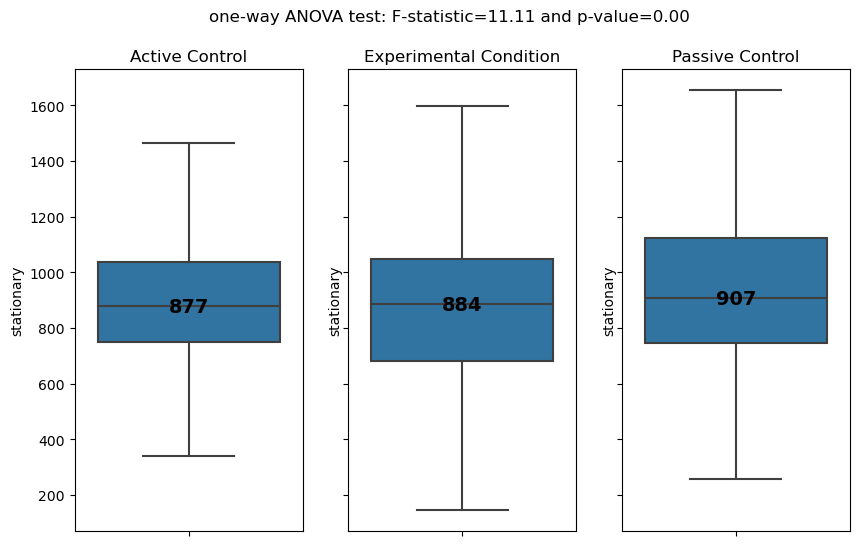

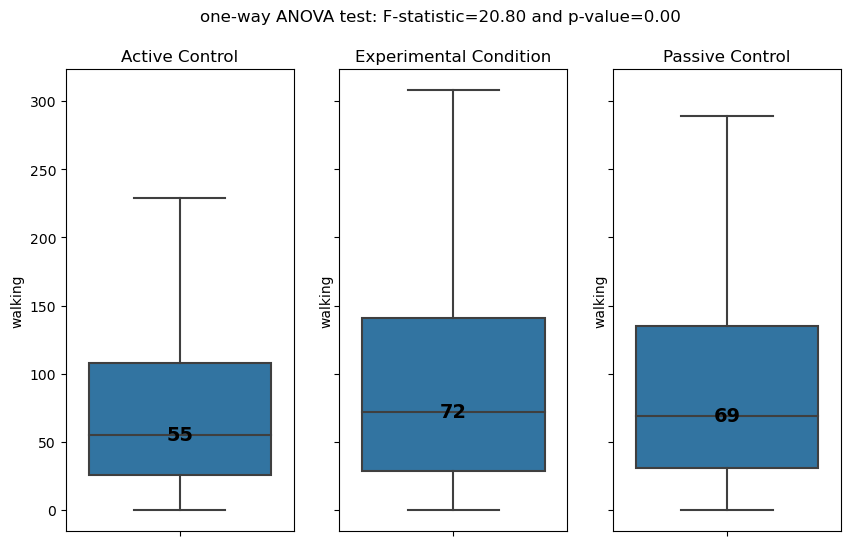

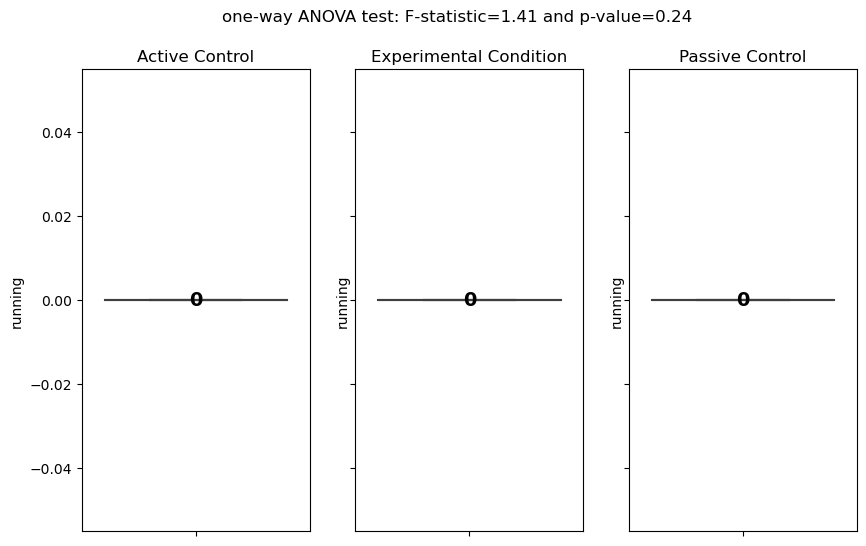

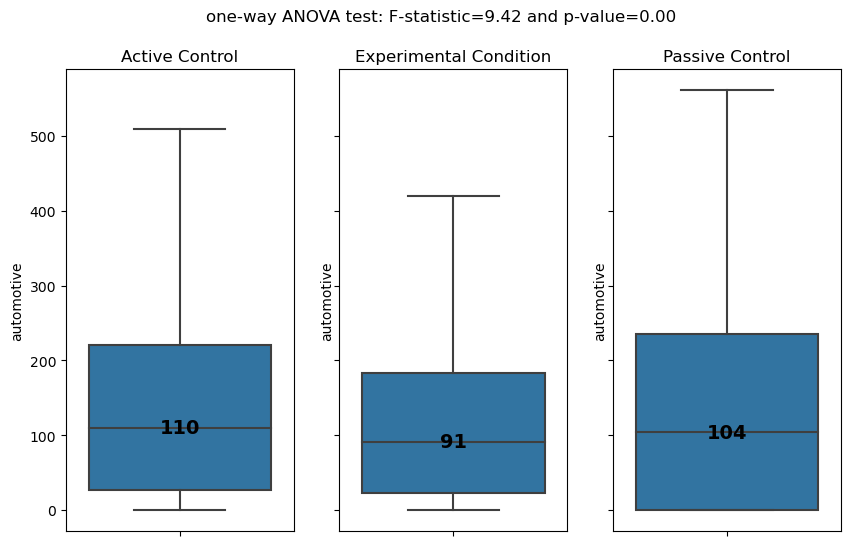

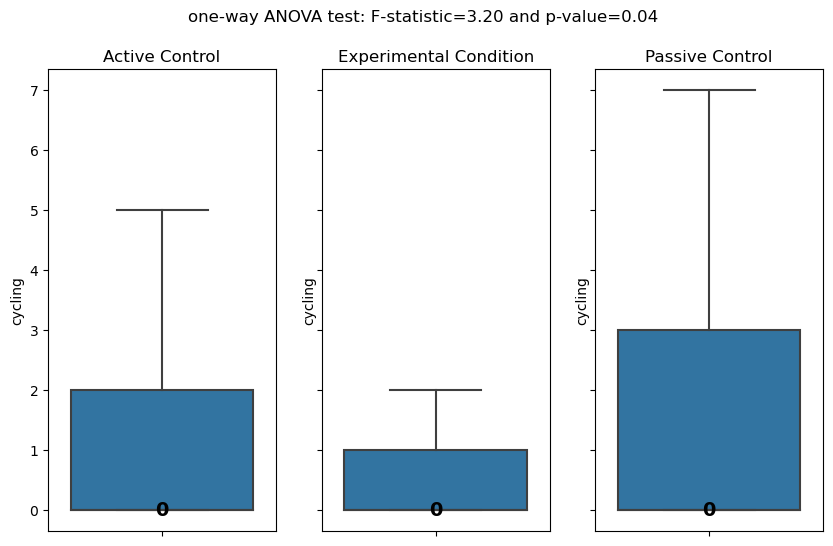

In [12]:

mylist = ['stationary', 'walking', 'running', 'automotive', 'cycling']
for clm in mylist:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 6), sharey=True)
    sns.boxplot(y=active_control[clm], orient="v", showfliers=False, ax=ax1)
    sns.boxplot(y=experimental_condition[clm],
                orient="v", showfliers=False, ax=ax2)
    sns.boxplot(y=passive_control[clm], orient="v", showfliers=False, ax=ax3)

    ax1.set_title("Active Control")
    m1 = int(active_control[clm].median())
    ax1.text(0, m1, m1, ha='center', va='center',
             fontsize=14, fontdict={'fontweight': 'bold'})
    m2 = int(experimental_condition[clm].median())
    ax2.set_title("Experimental Condition")
    ax2.text(0, m2, m2, ha='center', va='center',
             fontsize=14, fontdict={'fontweight': 'bold'})
    m3 = int(passive_control[clm].median())
    ax3.set_title("Passive Control")
    ax3.text(0, m3, m3, ha='center', va='center',
             fontsize=14, fontdict={'fontweight': 'bold'})

    stat, p = stats.f_oneway(
        active_control[clm], experimental_condition[clm], passive_control[clm])
    mytext = 'one-way ANOVA test: F-statistic={:.2f} and p-value={:.2f}'.format(
        stat, p)
    plt.suptitle(mytext)
    plt.show()